# ANOMALY BASED INTRUSION DETECTION SYSTEM

## Importing Libraries

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split

## Reading the Dataset

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/MachineLearning/MTH-IDS/NSL-KDD/NSL-KDD_sampledataset.csv')

In [ ]:
df.head()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,Attack
0,0,146,0,0,0,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,11
1,0,0,0,0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,9
2,0,232,8153,0,0,0,0,0,1,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,11
3,0,199,420,0,0,0,0,0,1,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,11
4,0,0,0,0,0,0,0,0,0,0,...,19,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,9


In [ ]:
df.shape

(125972, 39)

In [ ]:
df['Attack'].value_counts()

11    67342
9     41214
17     3633
5      3599
15     2931
18     2646
10     1493
0       956
20      892
21      890
14      201
3        53
1        30
22       20
6        18
4        11
16       10
7         9
2         8
8         7
13        4
12        3
19        2
Name: Attack, dtype: int64

In [ ]:
df['Attack'][df['Attack'] != 11] = 1

<ipython-input-7-f15c808e468f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Attack'][df['Attack'] != 11] = 1


### Applying normalization to the data

In [ ]:
features = df.drop(['Attack'],axis=1).dtypes.index

In [ ]:
df[features] = df[features].apply(
    lambda x: (x - x.mean()) / (x.std()))

### Filling empty values with 0

In [ ]:
df = df.fillna(0)

### Partitioning data into x and y

In [ ]:
# Assuming your DataFrame is named df
df['Attack'] = df['Attack'].replace(11, 0)

In [ ]:
df['Attack'].value_counts()

0    67342
1    58630
Name: Attack, dtype: int64

In [ ]:
x = df.drop('Attack', axis = 1)
y = df['Attack']

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(x,y,train_size=0.70, random_state=2)

In [ ]:
X_train1 = X_train.values
x_test1 = X_test.values
y_train1 = Y_train.values
y_test1 = Y_test.values

## Using WCSS for finding best value of K

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import classification_report
from sklearn import metrics

In [ ]:
# finding wcss values for different number of clusters
wcss = []
for i in range(1, 50):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state = 42)
  kmeans.fit(X_train1)
  wcss.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

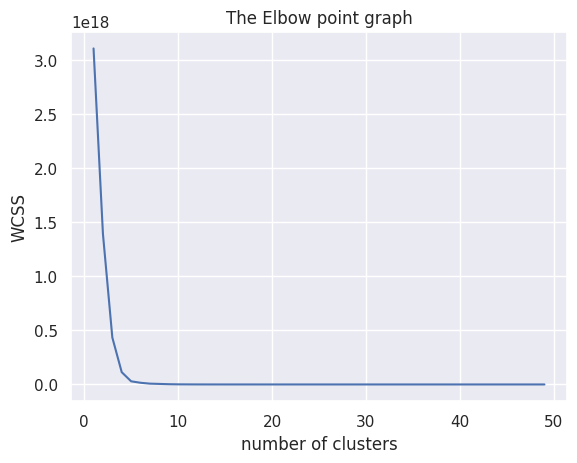

In [ ]:
sns.set()
plt.plot(range(1, 50), wcss)
plt.title('The Elbow point graph')
plt.xlabel('number of clusters')
plt.ylabel('WCSS')
plt.show()

## Using Silhoutte Score for finding best value of K

In [ ]:
from sklearn.metrics import silhouette_samples,silhouette_score

In [ ]:
ssd =[]

for k in range(2,100):
    model = KMeans(n_clusters=k)
    model.fit(X_train1)
    ssd.append(model.inertia_)
    print(f'Silhouette Score for {k} clusters: {silhouette_score(X_train1, model.labels_)}')

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for 2 clusters: 0.9999190792341436


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for 3 clusters: 0.999885078624772


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for 4 clusters: 0.9998928425979646


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for 5 clusters: 0.9998752632960473


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for 6 clusters: 0.999829547792941


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for 7 clusters: 0.999659299489527


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for 8 clusters: 0.9996426264092446


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for 9 clusters: 0.9969588263534324


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for 10 clusters: 0.9961420390973167


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for 11 clusters: 0.9966185663234515


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for 12 clusters: 0.9965698190948268


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for 13 clusters: 0.9965808399960405


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for 14 clusters: 0.9945700672776189


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for 15 clusters: 0.9945728897039756


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for 16 clusters: 0.9897768701405927


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [17]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.cluster import MiniBatchKMeans
from sklearn import metrics
import time

def CL_kmeans(X_train1, X_test1, y_train1, y_test1, n, b=100):
    start_time = time.time()

    km_cluster = MiniBatchKMeans(n_clusters=n, batch_size=b)
    result = km_cluster.fit_predict(X_train1)
    result2 = km_cluster.predict(X_test1)

    cluster_creation_time = time.time() - start_time

    count = 0
    a = np.zeros(n)  # a[i] is normal samples in cluster i
    count_b = np.zeros(n)
    for v in range(0, n):
        for i in range(0, len(y_train1)):
            if result[i] == v:
                if y_train1[i] == 1:  # sample is an attack
                    a[v] = a[v] + 1
                else:
                    count_b[v] = count_b[v] + 1

    list1 = []  # normal cluster
    list2 = []  # attack cluster
    for v in range(0, n):
        if a[v] <= count_b[v]:
            list1.append(v)
        else:
            list2.append(v)

    true_positives = 0
    false_positives = 0
    true_negatives = 0
    false_negatives = 0

    for v in range(0, len(y_test1)):
        if result2[v] in list1:
            result2[v] = 0
        elif result2[v] in list2:
            result2[v] = 1
        else:
            print("-1")

        if y_test1[v] == 1 and result2[v] == 1:
            true_positives += 1
        elif y_test1[v] == 0 and result2[v] == 1:
            false_positives += 1
        elif y_test1[v] == 0 and result2[v] == 0:
            true_negatives += 1
        elif y_test1[v] == 1 and result2[v] == 0:
            false_negatives += 1

    print("True Positives:", true_positives)
    print("False Positives:", false_positives)
    print("True Negatives:", true_negatives)
    print("False Negatives:", false_negatives)

    print(classification_report(y_test1, result2))
    cm = confusion_matrix(y_test1, result2)
    acc = metrics.accuracy_score(y_test1, result2)
    print(str(acc))
    print(cm)

    classification_time = time.time() - cluster_creation_time - start_time
    print("Cluster Creation Time:", cluster_creation_time)
    print("Classification Time:", classification_time)

    cm_df = pd.DataFrame(
        [[true_negatives, false_positives], [false_negatives, true_positives]],
        index=["Actual 0", "Actual 1"],
        columns=["Predicted 0", "Predicted 1"],
    )

    # Plot the heatmap
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm_df, annot=True, fmt="d", cmap="Blues")
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


True Positives: 17215
False Positives: 557
True Negatives: 19525
False Negatives: 495
              precision    recall  f1-score   support

           0       0.98      0.97      0.97     20082
           1       0.97      0.97      0.97     17710

    accuracy                           0.97     37792
   macro avg       0.97      0.97      0.97     37792
weighted avg       0.97      0.97      0.97     37792

0.9721634208298052
[[19525   557]
 [  495 17215]]
Cluster Creation Time: 3.7637553215026855
Classification Time: 193.22825288772583


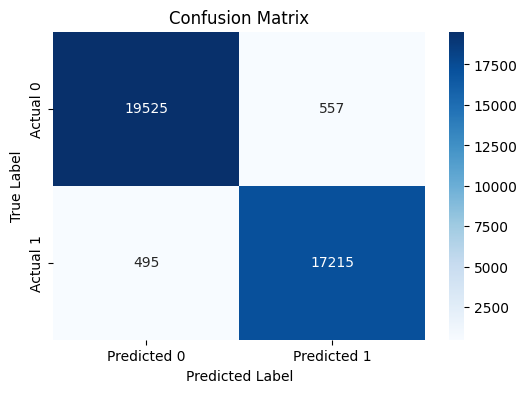

In [18]:
CL_kmeans(X_train1, x_test1, y_train1, y_test1, 1277)